In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

In [2]:
def load_data():

    datagen = ImageDataGenerator(rescale = 1/255)
    
    
    test_it = datagen.flow_from_directory ('test/', target_size = (256, 256), 
                                            class_mode = 'categorical', color_mode="rgb", batch_size=64, seed = 1,  shuffle=False)
    
    return test_it

test_it = load_data()

Found 1700 images belonging to 17 classes.


In [3]:
model_ResNet_original = load_model('ResNet_original_87_final.h5')

In [4]:
model_ResNet_Augmented = load_model('ResNet_augmented_90_final.h5')

In [5]:
model_CNN_augmented = load_model('CNN_Augmented_84_final')

In [6]:
model_CNN_original = load_model ('CNN_original_79_final')

In [7]:
class_names = list(test_it.class_indices.keys())

# CNN with Original Data

In [36]:
test_it.reset()
preds = model_CNN_original.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)

cr_CNN_original = pd.DataFrame(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices, output_dict=True)).transpose()

cr_CNN_original

,precision,recall,f1-score,support
1977,0.740741,1.000000,0.851064,100.000000
Amaro,0.765432,0.620000,0.685083,100.000000
Brannan,0.698276,0.810000,0.750000,100.000000
Clarendon,0.750000,0.660000,0.702128,100.000000
Gingham,0.710744,0.860000,0.778281,100.000000
He-Fe,0.816514,0.890000,0.851675,100.000000
Hudson,0.867925,0.920000,0.893204,100.000000
Lo-Fi,0.612903,0.570000,0.590674,100.000000
Mayfair,0.750000,0.780000,0.764706,100.000000
Nashville,0.869565,1.000000,0.930233,100.000000


In [9]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

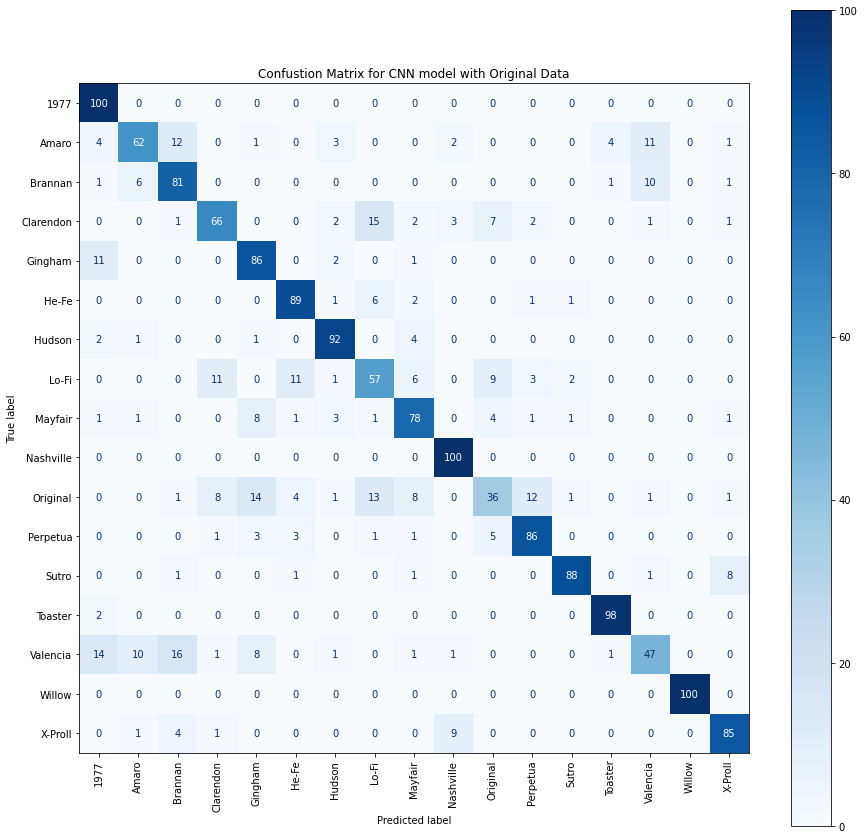

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for CNN model with Original Data')
plt.xticks(rotation=90)
plt.show();

# CNN with Augmented Data

In [35]:
test_it.reset()
preds = model_CNN_augmented.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)

cr_CNN_aug = pd.DataFrame(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices, output_dict=True)).transpose()

cr_CNN_aug

,precision,recall,f1-score,support
1977,0.910000,0.910000,0.910000,100.000000
Amaro,0.721739,0.830000,0.772093,100.000000
Brannan,0.979381,0.950000,0.964467,100.000000
Clarendon,0.707071,0.700000,0.703518,100.000000
Gingham,0.855670,0.830000,0.842640,100.000000
He-Fe,0.773913,0.890000,0.827907,100.000000
Hudson,0.844037,0.920000,0.880383,100.000000
Lo-Fi,0.529851,0.710000,0.606838,100.000000
Mayfair,0.719626,0.770000,0.743961,100.000000
Nashville,0.980000,0.980000,0.980000,100.000000


In [12]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

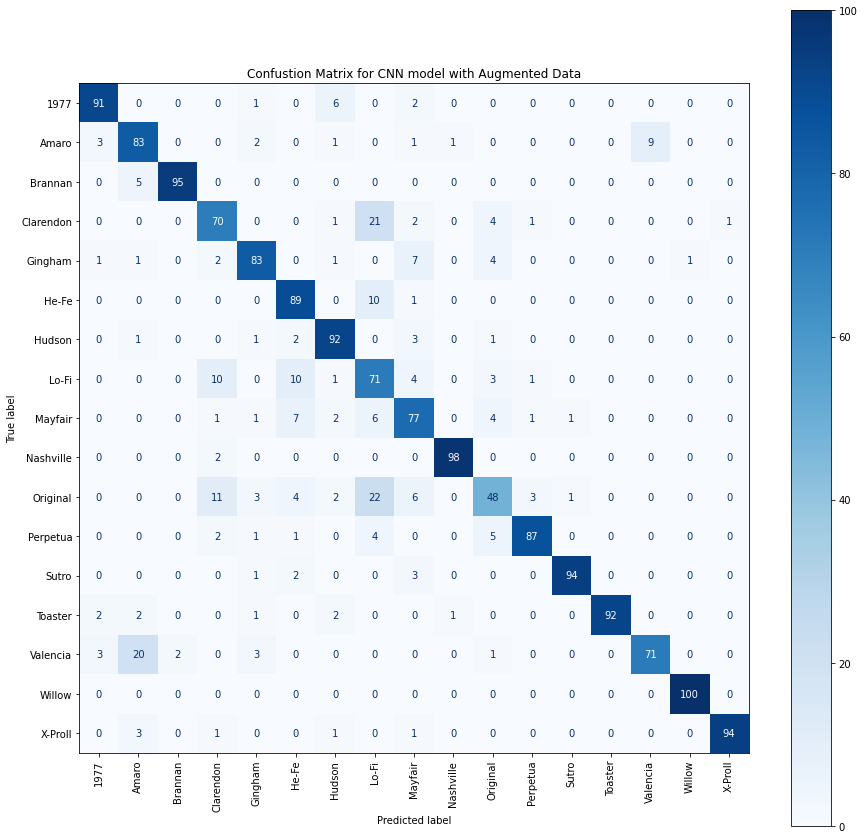

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for CNN model with Augmented Data')
plt.xticks(rotation=90)
plt.show();

# ResNet with Original Data

In [37]:
test_it.reset()
preds = model_ResNet_original.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)

cr_ResNet_original = pd.DataFrame(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices, output_dict=True)).transpose()

cr_ResNet_original

,precision,recall,f1-score,support
1977,0.942308,0.980000,0.960784,100.000000
Amaro,0.768519,0.830000,0.798077,100.000000
Brannan,0.826087,0.950000,0.883721,100.000000
Clarendon,0.842697,0.750000,0.793651,100.000000
Gingham,0.826446,1.000000,0.904977,100.000000
He-Fe,0.934066,0.850000,0.890052,100.000000
Hudson,0.918367,0.900000,0.909091,100.000000
Lo-Fi,0.725664,0.820000,0.769953,100.000000
Mayfair,0.785124,0.950000,0.859729,100.000000
Nashville,0.988372,0.850000,0.913978,100.000000


In [15]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

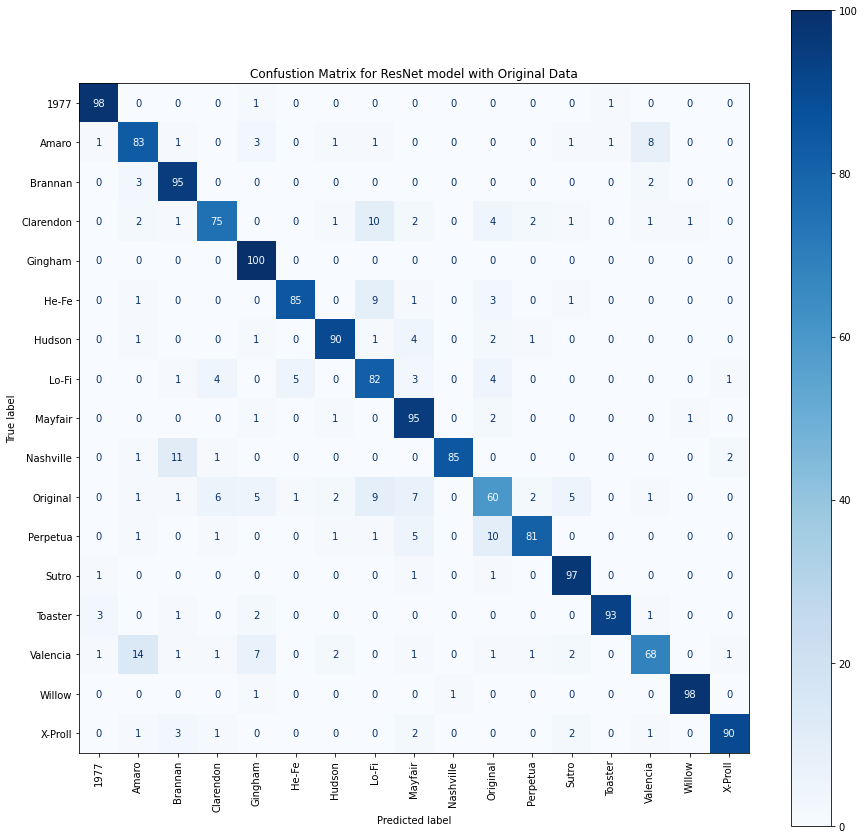

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for ResNet model with Original Data')
plt.xticks(rotation=90)
plt.show();

# ResNet with Augmented Data

In [66]:
test_it.reset()
preds = model_ResNet_Augmented.predict(test_it, steps = 27)
y_predict = np.argmax(preds,axis=1)

cr_ResNet_aug = pd.DataFrame(classification_report(test_it.classes, y_predict, target_names=test_it.class_indices, output_dict=True)).transpose()

cr_ResNet_aug

,precision,recall,f1-score,support
1977,0.925234,0.990000,0.956522,100.000000
Amaro,0.827273,0.910000,0.866667,100.000000
Brannan,0.960784,0.980000,0.970297,100.000000
Clarendon,0.788462,0.820000,0.803922,100.000000
Gingham,0.843478,0.970000,0.902326,100.000000
He-Fe,0.893204,0.920000,0.906404,100.000000
Hudson,0.969697,0.960000,0.964824,100.000000
Lo-Fi,0.773196,0.750000,0.761421,100.000000
Mayfair,0.848214,0.950000,0.896226,100.000000
Nashville,0.980198,0.990000,0.985075,100.000000


In [67]:
y_test_array = np.array(test_it.labels)
y_pred = np.array(y_predict)

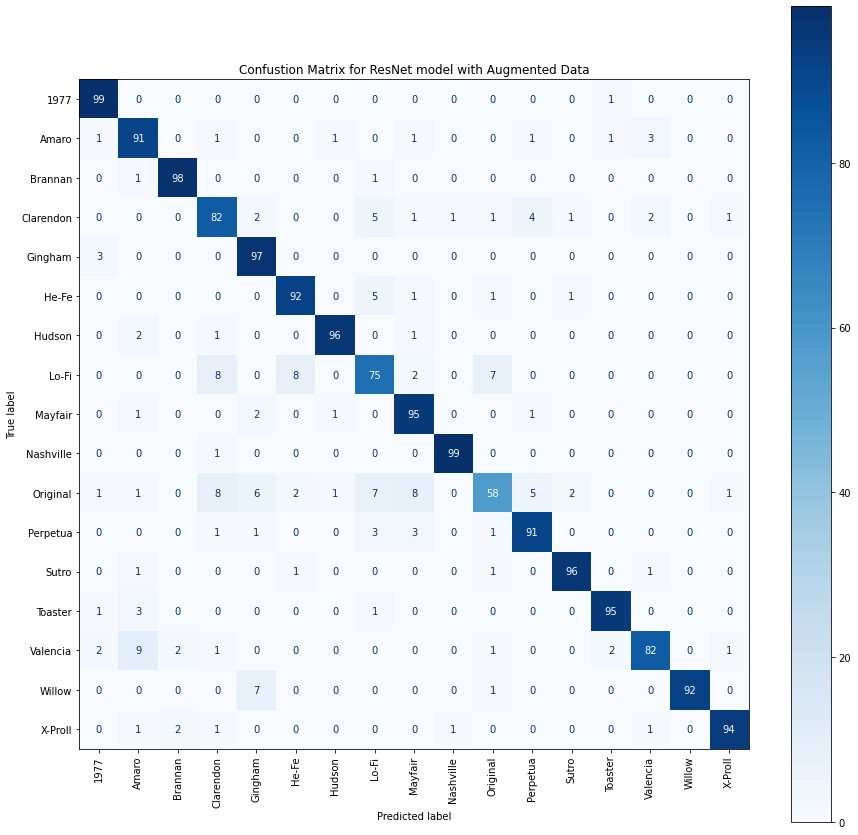

In [68]:
fig, ax = plt.subplots(figsize=(15, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_array, y_pred),
    display_labels=class_names,)

cmp.plot(ax=ax, cmap = 'Blues')
plt.title ('Confustion Matrix for ResNet model with Augmented Data')
plt.xticks(rotation=90)
plt.show();

# Precision Comparision

In [121]:
cr_Vgg16_aug = pd.read_csv('VGG16_Augmented_90.csv', index_col = 0)

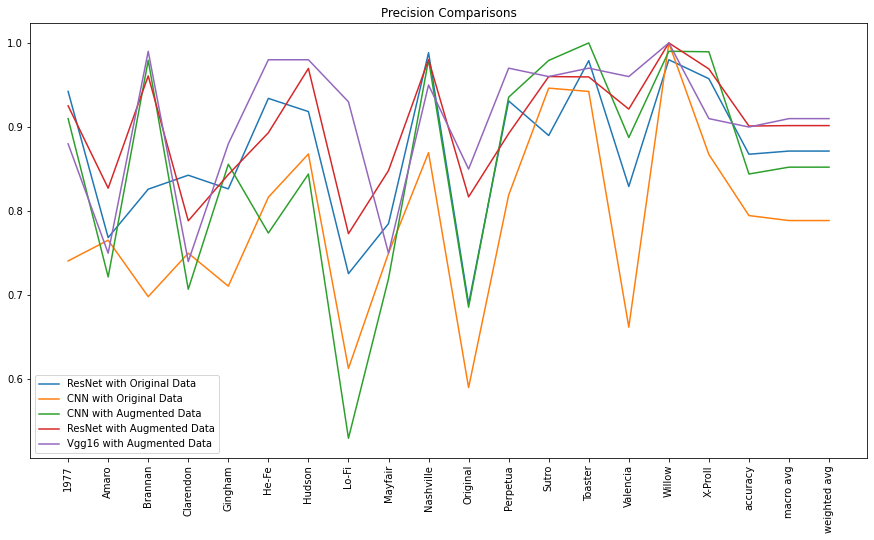

In [126]:
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)

plt.plot(cr_ResNet_original.iloc[:,0], label = "ResNet with Original Data")
plt.plot(cr_CNN_original.iloc[:,0], label = "CNN with Original Data")
plt.plot(cr_CNN_aug.iloc[:,0], label = "CNN with Augmented Data")
plt.plot(cr_ResNet_aug.iloc[:,0], label = "ResNet with Augmented Data")
plt.plot(cr_Vgg16_aug.iloc[:,0], label = "Vgg16 with Augmented Data")
plt.title("Precision Comparisons")
plt.legend()
plt.show()

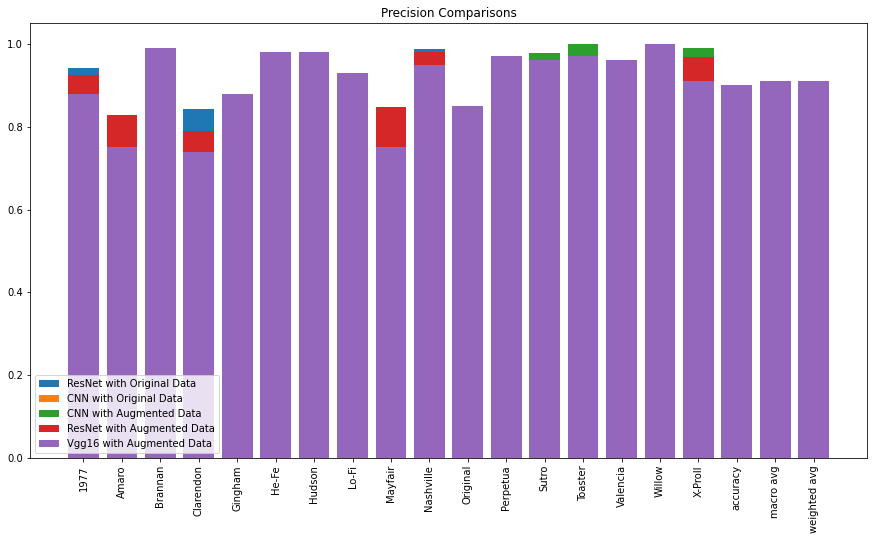

In [133]:
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)

plt.bar(cr_CNN_original.index, cr_CNN_original.iloc[:,0], label = "CNN with Original Data")
plt.bar(cr_CNN_aug.index, cr_CNN_aug.iloc[:,0], label = "CNN with Augmented Data")
plt.bar(cr_ResNet_original.index, cr_ResNet_original.iloc[:,0], label = "ResNet with Original Data")
plt.bar(cr_ResNet_aug.index, cr_ResNet_aug.iloc[:,0], label = "ResNet with Augmented Data")
plt.bar(cr_Vgg16_aug.index, cr_Vgg16_aug.iloc[:,0], label = "Vgg16 with Augmented Data")
plt.title("Precision Comparisons")

plt.legend(loc = 'lower left')
plt.show()

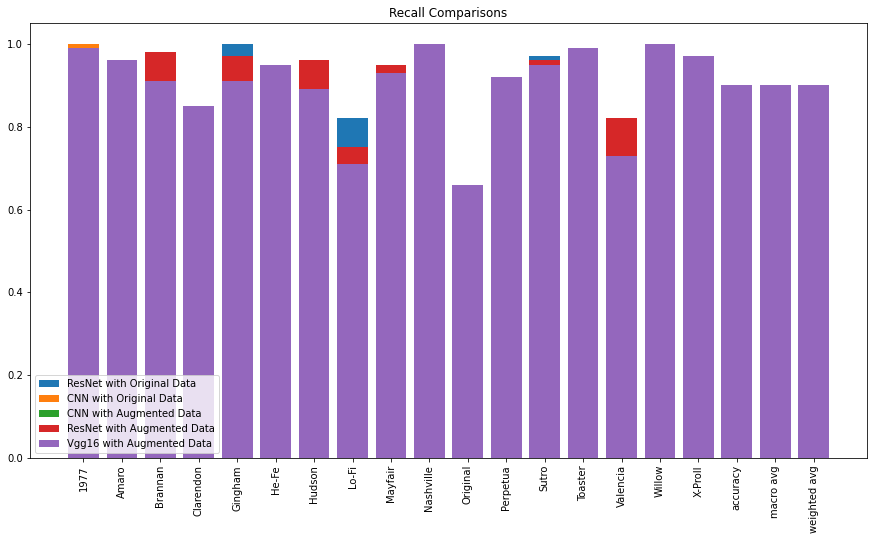

In [135]:
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)

plt.bar(cr_CNN_original.index, cr_CNN_original.iloc[:,1], label = "CNN with Original Data")
plt.bar(cr_CNN_aug.index, cr_CNN_aug.iloc[:,1], label = "CNN with Augmented Data")
plt.bar(cr_ResNet_original.index, cr_ResNet_original.iloc[:,1], label = "ResNet with Original Data")
plt.bar(cr_ResNet_aug.index, cr_ResNet_aug.iloc[:,1], label = "ResNet with Augmented Data")
plt.bar(cr_Vgg16_aug.index, cr_Vgg16_aug.iloc[:,1], label = "Vgg16 with Augmented Data")
plt.title("Recall Comparisons")

plt.legend(loc = 'lower left')
plt.show()

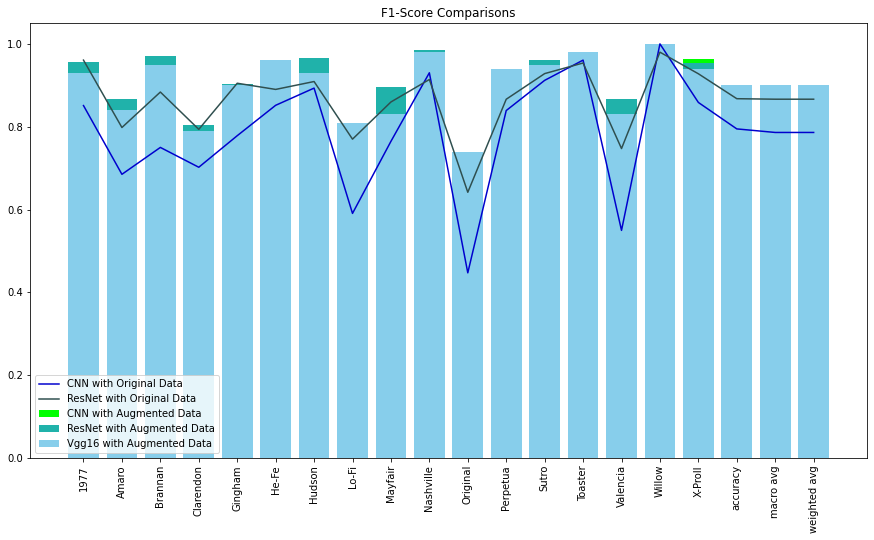

In [150]:
plt.subplots(figsize=(15, 8))
plt.xticks(rotation=90)

plt.plot(cr_CNN_original.index, cr_CNN_original.iloc[:,2], label = "CNN with Original Data", color = 'mediumblue')
plt.bar(cr_CNN_aug.index, cr_CNN_aug.iloc[:,2], label = "CNN with Augmented Data", color = 'lime')
plt.plot(cr_ResNet_original.index, cr_ResNet_original.iloc[:,2], label = "ResNet with Original Data", color = 'darkslategray')
plt.bar(cr_ResNet_aug.index, cr_ResNet_aug.iloc[:,2], label = "ResNet with Augmented Data", color = 'lightseagreen')
plt.bar(cr_Vgg16_aug.index, cr_Vgg16_aug.iloc[:,2], label = "Vgg16 with Augmented Data", color = 'skyblue')

plt.title("F1-Score Comparisons")

plt.legend(loc = 'lower left')
plt.show()